https://pythonnumericalmethods.berkeley.edu/notebooks/chapter23.03-Finite-Difference-Method.html
http://www.mitht.rssi.ru/it/pdf/cm/4_kraj.pdf

2. Вычисление параметров pi, qi, fi в узловых точках.
3. Составление системы ур-ний (11).
4. Составление 0-го и n-го уравнений.
5. Удаление переменных и преобразование 0-го и n-го уравнений (раздел 3).
6. Решение СЛАУ  (метод прогонки).
7. Анализ устойчивости. Надо просчитать задачу для n и для 2n узлов, так, чтобы различия в общих узлах составляли не более 1%.

## Краевые условия
c1y(a) + c2y'(a) = c
d1y(b) + d2y'(b) = d

_альтернативный вид_
a0y(a) + a1y'(a) = 0
b0y(b) + b1y'(b) = 0


## Задача
дифур y'' + y = 1;
краевые условия:    y(0) = 0;   y(pi) = 0;
отсюда
p = 0, q = 1, f = 1
c1 = 1, c = 0;
d1 = 1, d = 0;

На [a, b] ввести сетку с шагом h = (b - a) / n
x0 = a; xn = b; xi = x0 + ih = xi-1 + h;      yi ~ y(xi) - точное решение

In [8]:
import numpy as np

def diff(y):
    return 1 - y

p = 0
q = 1
f = 1
c1 = 1
c = 0
d1 = 1
d = 0

a = 0
b = np.pi

# шаги
n = 20
h = b / n
# h = 0.2
# n = int(np.floor((b - a) / h))


In [9]:
import math

b0 = (-2/(h * (2 - p * h))) + ((q * h) / (2 - p * h)) + c1
c0 = 2 / (h * (2 - p * h))
d0 = 0 + ((h * 1) / (2 - p * h))

an = (-2/(h * (2 + p * h)))
bn = 2 / (h * (2 + p * h)) - ((q * h) / (2 + p * h)) + 1
cn = 0
dn = 0 - ((h * 1) / (2 + p * h))

A = np.zeros((n + 1, n + 1))
# A[0, 0] = 1 # - вот тут хз какие коэф засунуть для первого ур-я
A[0, 0] = b0 # - вот тут хз какие коэф засунуть для первого ур-я
A[0, 1] = c0 # - вот тут хз какие коэф засунуть для первого ур-я

A[n, n - 1] = an # - вот тут хз какие коэф засунуть для последнего ур-я
A[n, n] = bn # - вот тут хз какие коэф засунуть для последнего ур-я
# A[n, n] = 1 # - вот тут хз какие коэф засунуть для последнего ур-я

# коэф для yi-1
def get_first():
    return 1 - (h * p)/2

# коэф для yi
def get_second():
    return (math.pow(h, 2) * q - 2)

# коэф для yi+1
def get_third():
    return 1 + (h * p)/2

for i in range(n):
    if i == 0: continue
    A[i, i - 1] = get_first()
    A[i, i] = get_second()
    A[i, i + 1] = get_third()

B = np.zeros(n + 1)
B[1: -1] = -math.pow(h, 2) * 1 ## тут типа коэф h^2 * f для i = 1, 2, 3
B[0] = d0 # надо какой-то для первого
B[-1] = dn # надо какой-то для последнего вставить

print('B', B)

B [ 0.07853982 -0.02467401 -0.02467401 -0.02467401 -0.02467401 -0.02467401
 -0.02467401 -0.02467401 -0.02467401 -0.02467401 -0.02467401 -0.02467401
 -0.02467401 -0.02467401 -0.02467401 -0.02467401 -0.02467401 -0.02467401
 -0.02467401 -0.02467401 -0.07853982]


In [10]:
Y = np.linalg.solve(A, B)
t = np.linspace(-10, 10, n + 1)
print(Y)

[ 308.33297651  256.1085772   197.54027802  134.07319384   67.27331218
   -1.21114593  -69.69039422 -136.47477497 -199.91644963 -258.45005762
 -310.63134006 -355.17277541 -390.9753478  -417.15566417 -433.06775111
 -438.31899359 -432.77982242 -416.58691116 -390.13980388 -354.0910568
 -309.33013709]


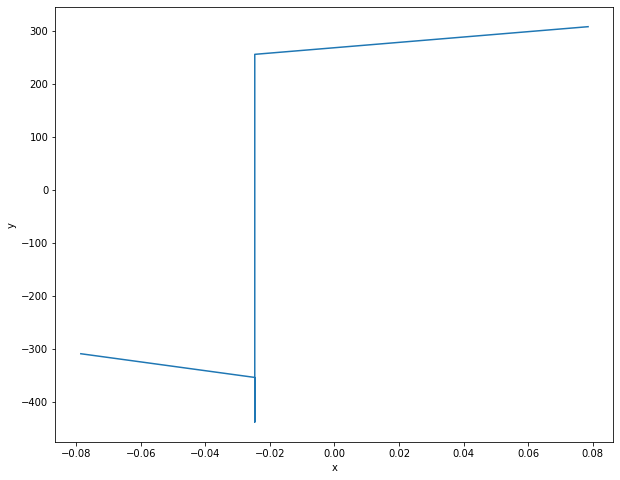

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(B, Y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()